In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

# Data Exploration

In [4]:
df = pd.read_parquet("../assets/train_data.parquet")

In [5]:
df

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


In [7]:
df.dtypes

sku                         int64
date                       object
sold_quantity               int64
current_price             float64
currency                   object
listing_type               object
shipping_logistic_type     object
shipping_payment           object
minutes_active            float64
dtype: object

In [8]:
df["date"] = pd.to_datetime(df["date"])

In [10]:
df["date"].min(), df["date"].max()

(Timestamp('2021-02-01 00:00:00'), Timestamp('2021-03-31 00:00:00'))

In [12]:
df["sku"].nunique()

660916

In [16]:
def plot_time_series(time_series: pd.Series) -> go.Figure:
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(
            x=time_series.index,
            y=time_series,
            line=go.scatter.Line(color="black", width=2),
        )
    )
    fig.update_layout(title_text="Time Series", xaxis_rangeslider_visible=True)

    return fig

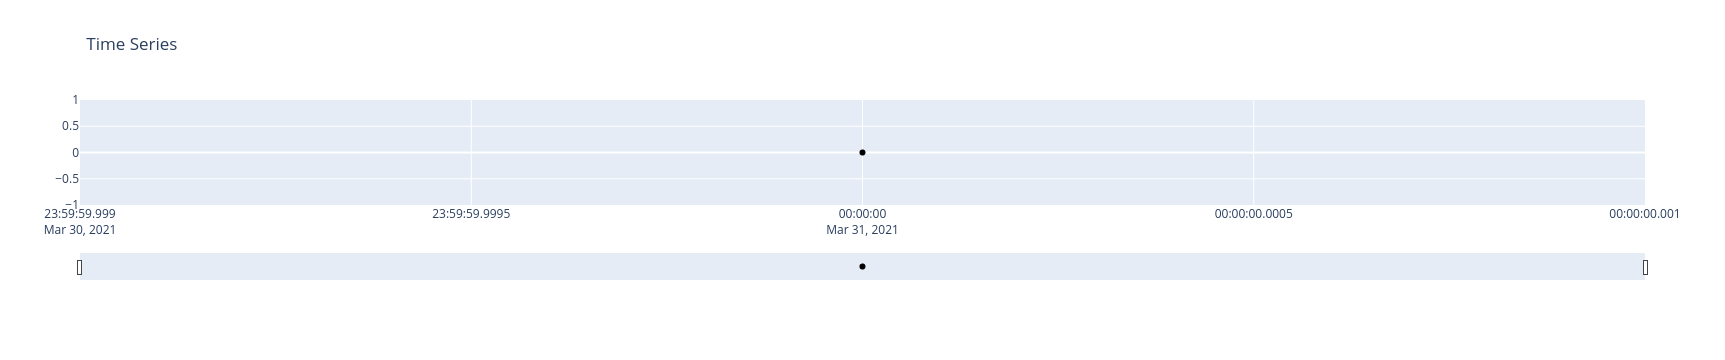

In [18]:
plot_time_series(df[df["sku"] == 129187].set_index("date")["sold_quantity"])

In [19]:
df[df["sku"] == 129187]

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
37660274,129187,2021-03-31,0,22057.0,ARG,classic,drop_off,free_shipping,267.710767


In [20]:
test_df = pd.read_csv("../assets/test_data.csv")

In [21]:
test_df[test_df["sku"] == 129187]

,sku,target_stock
551467,129187,8


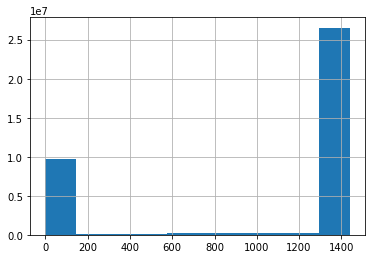

In [22]:
df["minutes_active"].hist();

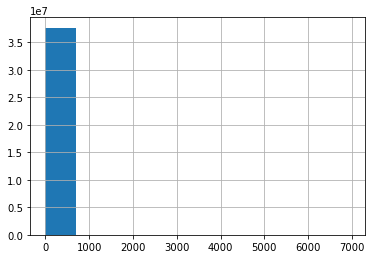

In [31]:
df["sold_quantity"].hist();

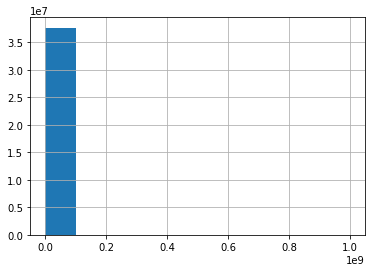

In [34]:
df["current_price"].hist();

In [33]:
df["sold_quantity"].describe()

count    3.766028e+07
mean     9.900934e-01
std      9.989535e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.951000e+03
Name: sold_quantity, dtype: float64

In [25]:
df["shipping_payment"].value_counts() / len(df)

paid_shipping    0.662442
free_shipping    0.337558
Name: shipping_payment, dtype: float64

In [26]:
df["shipping_logistic_type"].value_counts() / len(df)

fulfillment      0.860071
drop_off         0.073418
cross_docking    0.066512
Name: shipping_logistic_type, dtype: float64

In [27]:
df["listing_type"].value_counts() / len(df)

classic    0.500815
premium    0.499185
Name: listing_type, dtype: float64

In [28]:
df["currency"].value_counts() / len(df)

REA    0.510595
MEX    0.402487
ARG    0.086913
DOL    0.000005
Name: currency, dtype: float64

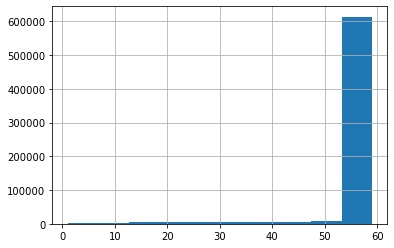

In [36]:
df.groupby("sku")["date"].count().hist();

In [38]:
df.groupby("sku")["date"].count().describe()

count    660916.000000
mean         56.981945
std           8.094631
min           1.000000
25%          59.000000
50%          59.000000
75%          59.000000
max          59.000000
Name: date, dtype: float64

In [43]:
sum(df.groupby("sku")["date"].count() < 2)

552

In [44]:
metadata_df = pd.read_json("../assets/items_static_metadata_full.jl", lines=True)

In [45]:
metadata_df

,item_domain_id,item_id,item_title,site_id,sku,product_id,product_family_id
0,MLB-SNEAKERS,492155,Tênis Masculino Olympikus Cyber Barato Promoçao,MLB,0,None,MLB15832732
1,MLB-SURFBOARD_RACKS,300279,Suporte Rack Prancha Parede C/ Regulagem Horiz...,MLB,1,None,None
2,MLM-NECKLACES,69847,5 Collares Plateados Dama Gargantilla Choker -...,MLM,2,None,None
3,MLM-RINGS,298603,Lindo Anillo De Bella Crepusculo Twilight Prom...,MLM,3,None,None
4,MLB-WEBCAMS,345949,Webcam Com Microfone Hd 720p Knup Youtube Pc V...,MLB,4,None,None
...,...,...,...,...,...,...,...
660911,MLB-CELLPHONE_PARTS,320792,2 Parafuso Pentalobe Torx iPhone 5 5c 5s 6 6s ...,MLB,660911,None,None
660912,MLM-AUTOMOTIVE_EMBLEMS,90441,Emblema Circular Wolfsburg Edition 5cm,MLM,660912,None,None
660913,MLB-SOFA_AND_FUTON_COVERS,202580,Kit Capa De Sofá Coladinha Jogo 2e3 Lugares Ma...,MLB,660913,None,None
660914,MLB-SNEAKERS,490874,Calçado Sapatênis Clássico Baltic 234 Ollie,MLB,660914,None,None


In [48]:
sum(metadata_df["product_id"].isna()) / len(metadata_df)

0.9551107856369039

In [49]:
sum(metadata_df["product_family_id"].isna()) / len(metadata_df)

0.8741383171235074

In [50]:
metadata_df["item_domain_id"].nunique()

8408

In [52]:
metadata_df["site_id"].value_counts() / len(metadata_df)

MLB    0.508891
MLM    0.402339
MLA    0.088771
Name: site_id, dtype: float64

In [53]:
test_df

,sku,target_stock
0,464801,3
1,645793,4
2,99516,8
3,538100,8
4,557191,10
...,...,...
551467,129187,8
551468,6707,30
551469,170355,3
551470,246568,2
